In [1]:
import numpy as np
import re
import pandas as pd
data=pd.read_csv("update_rentdata_26102016.csv",sep=",")

In [24]:
print data.columns

Index([u'propertyCode', u'thumbnail', u'numPhotos', u'floor', u'price',
       u'propertyType', u'operation', u'size', u'exterior', u'rooms',
       u'bathrooms', u'address', u'province', u'municipality', u'district',
       u'country', u'neighborhood', u'latitude', u'longitude', u'showAddress',
       u'url', u'distance', u'hasVideo', u'newDevelopment', u'tenantNumber',
       u'tenantGender', u'hasLift', u'isSmokingAllowed', u'priceByArea'],
      dtype='object')


In [25]:
data=data[data['propertyCode']!='propertyCode']
# esto elimina los indices de las filas eliminadas--> hay que arreglarlo

In [26]:
print np.unique(data['tenantGender'])

[nan]


In [27]:
print np.unique(data['tenantNumber'])

[nan]


In [28]:
data = data.drop(['thumbnail', 'address','url','tenantGender','tenantNumber','isSmokingAllowed','distance'], axis=1)

In [29]:
data.columns

Index([u'propertyCode', u'numPhotos', u'floor', u'price', u'propertyType',
       u'operation', u'size', u'exterior', u'rooms', u'bathrooms', u'province',
       u'municipality', u'district', u'country', u'neighborhood', u'latitude',
       u'longitude', u'showAddress', u'hasVideo', u'newDevelopment',
       u'hasLift', u'priceByArea'],
      dtype='object')

In [30]:
pattern='^\d'
data['floor']=data['floor'].fillna(value='1000')
llista=[]
for element in tuple(data['floor']):
    f=bool(re.match(pattern,element))
    if f==False:
        llista=np.append(llista,element)
#print llista
for i in np.unique(llista):
    data[data['floor']==i]='0'

In [31]:
tofloat=['price','priceByArea','numPhotos','size','propertyCode','rooms','floor']
for col in tofloat:
    data[col]=data[col].astype(float)
data[data['floor']==1000]=np.nan

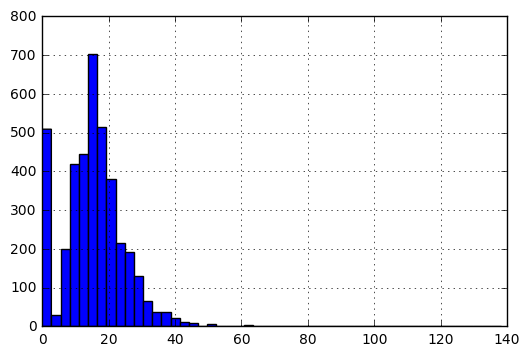

In [32]:
import matplotlib.pyplot as plt
plt.figure()
#data['priceByArea'].plot(kind='hist')
data['priceByArea'].hist(bins=50)
plt.show()

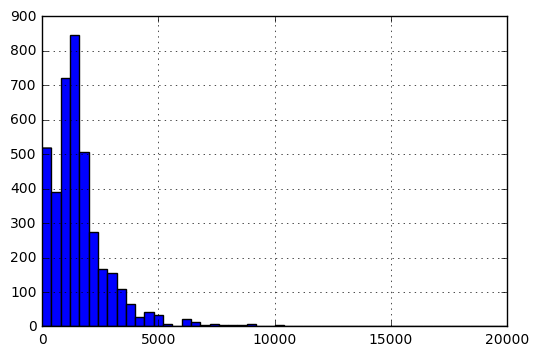

In [33]:
plt.figure()
data['price'].hist(bins=50)
plt.show()

In [34]:
print len(np.unique(data['district']))
print len(np.unique(data['neighborhood']))

106
109


In [35]:
print data.columns

Index([u'propertyCode', u'numPhotos', u'floor', u'price', u'propertyType',
       u'operation', u'size', u'exterior', u'rooms', u'bathrooms', u'province',
       u'municipality', u'district', u'country', u'neighborhood', u'latitude',
       u'longitude', u'showAddress', u'hasVideo', u'newDevelopment',
       u'hasLift', u'priceByArea'],
      dtype='object')


In [36]:
dades=['price','priceByArea','numPhotos','size','propertyCode','rooms','floor']
data_norm=[]
for i in dades:
    data_norm.append(data[i])

In [37]:
type(data_norm)

list

In [38]:
new_data=pd.concat([data['priceByArea'],data['size'],data['rooms'],data['price'],data['floor']],axis=1)

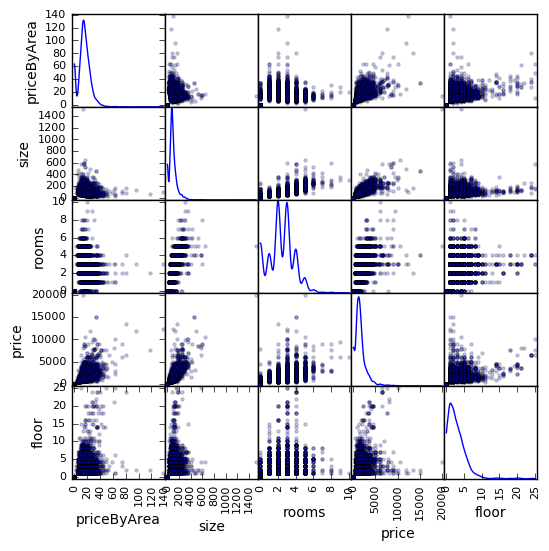

In [39]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(new_data, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

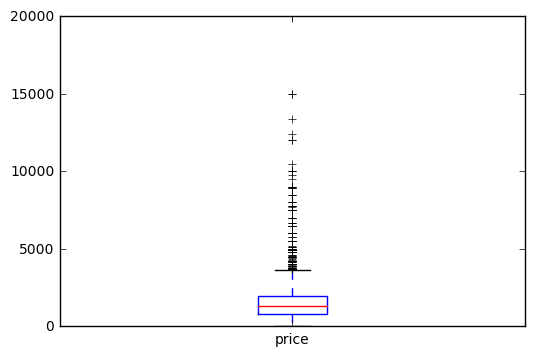

In [40]:
new_data['price'].plot(kind='box')
plt.show()

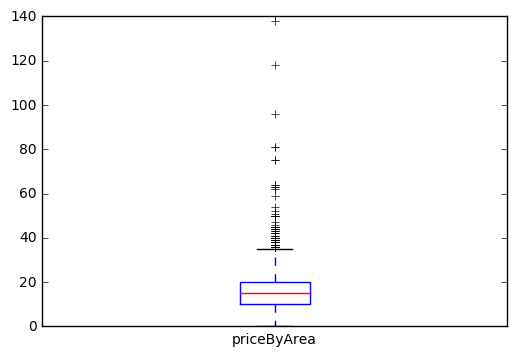

In [41]:
new_data['priceByArea'].plot(kind='box')
plt.show()

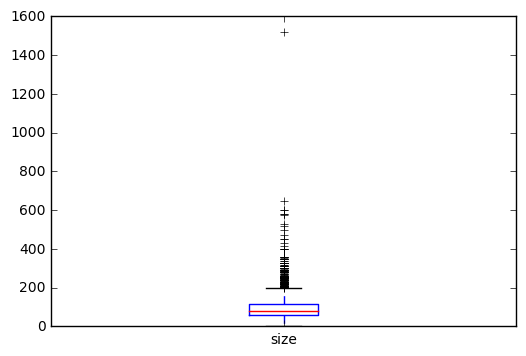

In [42]:
new_data['size'].plot(kind='box')
plt.show()

In [2]:
data['address']

0              calle de la Ciutat de Balaguer
1                        avenida del Paraŀlel
2       calle de francesc planas i casals, 20
3                              BARCELONA, 173
4                        calle de Palaudàries
5                         calle de l'Escorial
6                                      Centre
7                                   LLIBERTAT
8                                    trinquet
9              calle de Sant Joan de la Salle
10                       avenida de Barcelona
11                        calle de Verdi, 319
12                         passatge de Nogués
13                       avenida del Paraŀlel
14                        calle Santa Barbara
15                         paseo Bonanoba, 97
16                         calle d'aragó, 175
17                                    Cabrils
18                    San Sebastian-Aiguadolç
19                        paseo manuel girona
20                            plaza Comercial
21                                